<a href="https://colab.research.google.com/github/ganE510/Multi-label-Classsification/blob/patch1/Assignment1_MultiLabelClassification_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP47590: Advanced Machine Learning
# Assignment 1: Multi-label Classification

Name(s): 

Student Number(s):

## Import Packages Etc

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import hamming_loss, f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from imblearn.under_sampling import RandomUnderSampler

# import other useful packages

## Task 0: Load the Yeast Dataset

In [72]:
# Write your code here
dataset = pd.read_csv('yeast.csv')
num_classes = 14
display(dataset.head())

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,Att11,Att12,Att13,Att14,Att15,Att16,Att17,Att18,Att19,Att20,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,Att29,Att30,Att31,Att32,Att33,Att34,Att35,Att36,Att37,Att38,Att39,Att40,...,Att78,Att79,Att80,Att81,Att82,Att83,Att84,Att85,Att86,Att87,Att88,Att89,Att90,Att91,Att92,Att93,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,-0.027230,-0.137411,0.067776,0.047175,0.155671,0.050766,0.102557,-0.020259,-0.200512,-0.095371,-0.081940,-0.103735,0.093299,0.105475,0.148560,0.085925,0.107879,0.108075,0.085388,0.124026,-0.003650,-0.127376,0.039394,-0.018364,0.050378,0.157190,0.203563,0.111552,0.017907,-0.001126,...,-0.175325,-0.133636,0.005524,-0.014981,-0.031946,-0.015114,-0.047175,0.003829,0.010967,-0.006062,-0.027560,-0.019866,-0.024046,-0.025153,-0.009261,-0.025539,0.006166,-0.012976,-0.014259,-0.015024,-0.010747,0.000411,-0.032056,-0.018312,0.030126,0.124722,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,-0.215304,-0.009885,-0.155843,-0.059522,-0.098836,-0.071141,-0.023494,-0.071200,0.027767,0.003091,-0.003761,0.074600,0.053080,-0.008138,0.001794,-0.111704,-0.140291,-0.063347,0.066767,-0.167073,-0.095567,-0.047209,0.082206,0.144445,0.086581,-0.111850,-0.086560,0.024942,-0.131539,0.080062,...,-0.001249,-0.020209,-0.077359,-0.045139,-0.074738,0.051846,0.009323,0.184332,0.420424,-0.090224,-0.090718,-0.035266,-0.046729,0.000575,-0.066023,-0.051916,0.007680,0.027719,-0.085811,0.111123,0.050541,0.027565,-0.063569,-0.041471,-0.079758,0.017161,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,-0.040576,0.014326,-0.074968,0.141365,-0.015182,0.013691,0.006893,0.003736,-0.020726,-0.044104,-0.052959,-0.085572,-0.061547,-0.029578,0.027700,-0.094310,-0.047721,-0.081589,-0.022846,-0.106684,-0.068873,-0.105225,-0.065414,-0.047722,-0.070723,-0.057425,-0.042024,-0.034122,-0.049606,0.015137,...,-0.002432,0.001711,-0.083572,-0.096943,0.148457,-0.007413,0.130691,-0.032325,0.028612,-0.023051,-0.092214,-0.103336,0.138232,-0.100351,0.140423,0.110074,0.096277,-0.044932,-0.089470,-0.009162,-0.012010,0.308378,-0.028053,0.026710,-0.066565,-0.122352,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,-0.013027,0.045538,0.080412,-0.010042,0.013029,-0.071975,0.089818,-0.016129,0.033105,0.024275,0.040428,0.064248,0.225613,0.176576,0.015501,0.009491,-0.013684,-0.017633,0.085007,-0.056274,-0.088925,-0.062951,0.227151,0.165897,0.150224,0.065105,0.110891,0.048451,0.114726,0.020393,...,-0.111806,-0.154732,0.302807,0.340027,-0.093332,-0.057848,-0.010558,-0.039194,-0.041628,-0.077455,-0.008553,-0.022404,-0.106131,-0.103067,-0.083059,-0.089064,-0.083809,0.200354,-0.075716,0.196605,0.152758,-0.028484,-0.074207,-0.089227,-0.049913,-0.043893,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,-0.139371,0.041487,-0.058531,0.021264,-0.101382,0.021015,0.096572,-0.005136,0.111104,-0.008323,0.020210,-0.003967,0.039762,0.006744,-0.041730,-0.174533,-0.101343,-0.115674,0.328511,-0.108945,-0.160748,-0.120290,-0.148308,-0.082882,-0.127218,-0.167186,-0.143210,-0.118028,-0.297516,-0.160082,...,0.108388,0.095516,0.015942,0.087354,0.176911,-0.062311,0.117205,-0.048277,-0.053679,0.014850,-0.066453,-0.067962,-0.083653,-0.081130,-0.061469,0.023662,-0.060467,0.044351,-0.057209,0.028047,0.029661,-0.050026,0.023248,-0.061539,-0.035160,0.067834,0,0,1,1,1,1,0,0,0,0,0,0,0,0


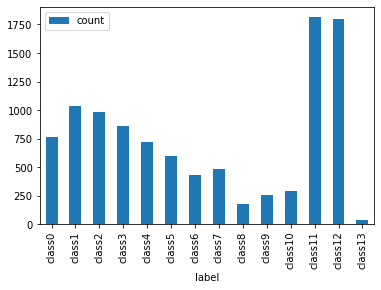

In [73]:
# visualize the labelcount
tag_dict ={}
for i in range(num_classes):
  tag_dict['class'+ i.__str__()] = dataset.iloc[:,103+i].value_counts()[1]
labelcount = pd.DataFrame(list(tag_dict.items()),columns=['label', 'count'])
labelcount.plot(x='label', y='count', kind='bar')
plt.show()

In [0]:
X = dataset
Y = np.array(dataset.iloc[:,103:])
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = 0.7)

## Task 1: Implement the Binary Relevance Algorithm

In [0]:
# Write your code here
class BinaryRelevanceClassifier(BaseEstimator, ClassifierMixin):
    # Constructor for the classifier object
    def __init__(self, add_noise = False):
        self.add_noise = add_noise
        
    # The fit function to train a classifier
    def fit(self, data, functions):    
        # Create a new empty dictionary into which we will store relevance
        self.relevances_ = dict()

        # Iterate all functioins
        for i in range(14):
            status = functions[:,i]
            status_squeeze = np.squeeze(status)
            self.relevances_[i] = BaggingClassifier(n_estimators=10, random_state=0).fit(data.iloc[:,:103], status_squeeze)
            
    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        # Check is fit had been called by confirming that the teamplates_ dictiponary has been set up
        check_is_fitted(self, ['relevances_'])

        # Initialise an empty list to store the predictions made
        pos_functions = list()
        
        # Iterate all functioins to predict
        for i in range(14):
            pos_functions.append(self.relevances_[i].predict(X.iloc[:,:103]))
            
        return np.array(pos_functions).T


In [78]:
my_model = BinaryRelevanceClassifier()
my_model.fit(X_train, y_train)
my_model.predict(X_test)

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 0, 0]])

## Task 2: Implement the Binary Relevance Algorithm with Under-Sampling

In [0]:
# Write your code here
class UnderBinaryRelevanceClassifier(BaseEstimator, ClassifierMixin):
    # Constructor for the classifier object
    def __init__(self, add_noise = False):
        self.add_noise = add_noise
        
    # The fit function to train a classifier
    def fit(self, data, functions): 
        # Create a new empty dictionary into which we will store relevance 
        self.relevances_ = dict()  
        for i in range(14):
            status = functions[:,i]
            status_squeeze = np.squeeze(status)
            rus = RandomUnderSampler(random_state=0)
            X_resampled, y_resampled = rus.fit_sample(data.iloc[:,:103], status)
            # print(X_resampled.shape)
            self.relevances_[i] = BaggingClassifier(n_estimators=10, random_state=0).fit(X_resampled, y_resampled)

        # Iterate all functioins
        
            
    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        # Check is fit had been called by confirming that the teamplates_ dictiponary has been set up
        check_is_fitted(self, ['relevances_'])

        # Initialise an empty list to store the predictions made
        pos_functions = list()
        
        # Iterate all functioins to predict
        for i in range(14):
            pos_functions.append(self.relevances_[i].predict(X.iloc[:,:103]))
            
        return np.array(pos_functions).T

In [80]:
my_model = UnderBinaryRelevanceClassifier()
my_model.fit(X_train, y_train)
my_model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

array([[1, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 1, 1]])

## Task 3: Compare the Performance of Different Binary Relevance Approaches

In [0]:
# Write your code here


## Task 4: Implement the Classifier Chains Algorithm

In [0]:
# Write your code here
class ClassChainsClassifier(BaseEstimator, ClassifierMixin):
    # Constructor for the classifier object
    def __init__(self, add_noise = False):
        self.add_noise = add_noise
        
    # The fit function to train a classifier
    def fit(self, data, functions):    
        # Create a new empty dictionary into which we will store relevance
        self.relevances_ = dict()
        data = data.iloc[:,:103]
        # Iterate all functioins
        for i in range(14):
            status = functions[:,i]
            status_squeeze = np.squeeze(status)
            self.relevances_[i] = BaggingClassifier(n_estimators=10, random_state=0).fit(data,status_squeeze)
            data = np.concatenate((data,np.reshape(status_squeeze,(data.shape[0],1))),axis=1)
            
    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        # Check is fit had been called by confirming that the teamplates_ dictiponary has been set up
        check_is_fitted(self, ['relevances_'])

        # Initialise an empty list to store the predictions made
        pos_functions = list()
        j = 0
        # Iterate all functioins to predict
        for i in range(14):
            j = 103+i
            # if len(X) > 0:
            pos_functions.append(self.relevances_[i].predict(X[:,:j]))
            
        return np.array(pos_functions).T

In [86]:
my_model = ClassChainsClassifier()
print(X_train)
my_model.fit(X_train, y_train)
my_model.predict(X_test)

          Att1      Att2      Att3  ...  Class12  Class13  Class14
2067  0.110645  0.075770 -0.074272  ...        0        0        0
936   0.067438 -0.086640  0.016308  ...        1        1        0
376   0.106957 -0.042980  0.145034  ...        0        0        0
2353 -0.054869 -0.014227  0.008956  ...        1        1        0
1432  0.053625  0.029986 -0.034318  ...        1        1        0
...        ...       ...       ...  ...      ...      ...      ...
1033 -0.030665 -0.093305  0.018542  ...        1        1        0
1731  0.116562 -0.016590  0.063544  ...        0        0        0
763   0.051961 -0.044374  0.105554  ...        1        1        0
835  -0.066107 -0.186666 -0.149487  ...        1        1        0
1653  0.047349 -0.020428  0.149070  ...        0        0        0

[1691 rows x 117 columns]


TypeError: ignored

## Task 5: Evaluate the Performance of the Classifier Chains Algorithm

In [0]:
# Write your code here


## Task 6: Reflect on the Performance of the Different Models Evaluated

*Write your reflection here (max 300 words)*
